# World Happiness Report Analysis

**Authors**: Boston Lee, Adam Kiehl 

**Source**: https://www.kaggle.com/unsdsn/world-happiness

### Importing Libraries:

In [57]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

### Reading Data:

The data was read from five different tables contained in a data folder. Each was also given revised headings for interpretability.

In [21]:
data_2015 = pd.read_csv('data/2015.csv', header = 0, 
                        names=['country', 'region', 'rank', 
                               'score', 'se', 'economy', 
                               'family', 'health', 'freedom', 
                               'trust', 'generosity', 'dystopian'])

data_2016 = pd.read_csv('data/2016.csv', header = 0, 
                        names=['country', 'region', 'rank', 
                               'score', 'lower', 'upper', 
                               'economy', 'family', 'health', 
                               'freedom', 'trust', 'generosity', 
                               'dystopian'])

data_2017 = pd.read_csv('data/2017.csv', header = 0, 
                        names=['country', 'rank', 'score', 
                               'high', 'low', 'economy', 'family', 
                               'health', 'freedom', 'generosity', 
                               'trust', 'dystopian'])

data_2018 = pd.read_csv('data/2018.csv', header = 0, 
                        names=['rank', 'country', 'score', 
                               'economy', 'family', 'health', 
                               'freedom', 'generosity', 'trust'])

data_2019 = pd.read_csv('data/2019.csv', header = 0, 
                        names=['rank', 'country', 'score', 
                               'economy', 'family', 'health', 
                               'freedom', 'generosity', 'trust'])

### Data manipulation and standardization:

The 2015 dataset included region labels for every country. In order to facilitate adding region to every DataFrame, we needed to create a DataFrame that matches countries to their corresponding regions. This new indexing DataFrame can then be used to incorporate region into every dataset. We needed to do this before modifying the underlying DataFrame of the 2015 data, so we decided to save this information first.

In [22]:
country_region_df = data_2015[['country', 'region']]
country_region_df

,country,region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
153,Rwanda,Sub-Saharan Africa
154,Benin,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa
156,Burundi,Sub-Saharan Africa


The available variables were different across the five tables, so we created a list of variables common to all DataFrames that were sufficient for analysis.

In [23]:
standard_variables = ['country', 'rank', 
                      'score', 'economy', 'family', 
                      'health', 'freedom', 'trust', 
                      'generosity']

We can then index every DataFrame by the standard variables given, making for easy merging.

In [24]:
data_2015 = data_2015[standard_variables]
data_2016 = data_2016[standard_variables]
data_2017 = data_2017[standard_variables]
data_2018 = data_2018[standard_variables]
data_2019 = data_2019[standard_variables]

From here, we can construct a DataFrame containing all of the years, by using `concat`.

In [25]:
full_data = pd.concat([data_2015, data_2016, data_2017, 
                            data_2018, data_2019], 
                           keys = ['2015', '2016', '2017', 
                                   '2018', '2019'], 
                           names = ['year'],
                           axis = 0)

We have now created a DataFrame indexed by both year and the initial implicit indices. We will reset the index, and get rid of the implicit index column.

In [26]:
full_data.reset_index(inplace = True)
full_data.drop('level_1', inplace = True, axis = 1)
full_data

,year,country,rank,score,economy,family,health,freedom,trust,generosity
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...,...
777,2019,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
778,2019,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
779,2019,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
780,2019,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


We can now merge the full DataFrame with the region labels, which were not included in every year's data. This is an overall easier process than adding the region column to every DataFrame individually.

In [27]:
full_data = pd.merge(full_data,country_region_df)
full_data

,year,country,rank,score,economy,family,health,freedom,trust,generosity,region
0,2015,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,Western Europe
1,2016,Switzerland,2,7.509,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,Western Europe
2,2017,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,Western Europe
3,2018,Switzerland,5,7.487,1.420000,1.549000,0.927000,0.660000,0.357000,0.256000,Western Europe
4,2019,Switzerland,6,7.480,1.452000,1.526000,1.052000,0.572000,0.343000,0.263000,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...
752,2015,Togo,158,2.839,0.208680,0.139950,0.284430,0.364530,0.107310,0.166810,Sub-Saharan Africa
753,2016,Togo,155,3.303,0.281230,0.000000,0.248110,0.346780,0.115870,0.175170,Sub-Saharan Africa
754,2017,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.095665,0.196896,Sub-Saharan Africa
755,2018,Togo,139,3.999,0.259000,0.474000,0.253000,0.434000,0.101000,0.158000,Sub-Saharan Africa


Now that we have a full dataset, we can check that the datatypes of the columns all make sense, as below.

In [28]:
full_data.dtypes

year           object
country        object
rank            int64
score         float64
economy       float64
family        float64
health        float64
freedom       float64
trust         float64
generosity    float64
region         object
dtype: object

Notice that `year` was read in as a string. This should not be terribly important, but it will make it easier to order years down the line, should we need to, if we make year into an `int`.

In [29]:
full_data.year = full_data.year.astype('int32')

### Reindexing With Heirarchical Index:

We can now perform the final step of creating our full DataFrame, which is to create a heirarchical index by region, then country, then year. This will allow for ease of analysis across the multiple variables.

In [30]:
full_data.set_index(['region','country', 'year'])

rank  score   economy    family  \
region             country     year                                    
Western Europe     Switzerland 2015     1  7.587  1.396510  1.349510   
                               2016     2  7.509  1.527330  1.145240   
                               2017     4  7.494  1.564980  1.516912   
                               2018     5  7.487  1.420000  1.549000   
                               2019     6  7.480  1.452000  1.526000   
...                                   ...    ...       ...       ...   
Sub-Saharan Africa Togo        2015   158  2.839  0.208680  0.139950   
                               2016   155  3.303  0.281230  0.000000   
                               2017   150  3.495  0.305445  0.431883   
                               2018   139  3.999  0.259000  0.474000   
                               2019   139  4.085  0.275000  0.572000   

                                       health   freedom     trust  generosity  
region             country     year                                            
Western Europe     Switzerland 2015  0.941430  0.665570  0.419780    0.296780  
                               2016  0.863030  0.585570  0.412030    0.280830  
                               2017  0.858131  0.620071  0.367007    0.290549  
                               2018  0.927000  0.660000  0.357000    0.256000  
                               2019  1.052000  0.572000  0.343000    0.263000  
...                                       ...       ...       ...         ...  
Sub-Saharan Africa Togo        2015  0.284430  0.364530  0.107310    0.166810  
                               2016  0.248110  0.346780  0.115870    0.175170  
                               2017  0.247106  0.380426  0.095665    0.196896  
                               2018  0.253000  0.434000  0.101000    0.158000  
                               2019  0.410000  0.293000  0.085000    0.177000  

[757 rows x 8 columns]

## Measuring Happiness Across Regions:

One of our first driving questions was whether or not certain regions of the world are happier than others. To do this, a simple `groupby` statement was used along with a `mean` aggregation.

In [31]:
full_data.groupby('region')[['region', 'score']].mean().sort_values(by = 'score', ascending = False, inplace = False)

,score
region,
Australia and New Zealand,7.294600
North America,7.174700
Western Europe,6.759311
Latin America and Caribbean,6.012876
Eastern Asia,5.630464
Central and Eastern Europe,5.428875
Middle East and Northern Africa,5.337208
Southeastern Asia,5.335227
Southern Asia,4.580657


It is clear that there is significant regional variation in mean happiness scores but to get a better understanding of the spread of the scores, a boxplot can be created. 

Text(0.5, 1.0, 'Happiness Scores by Region')

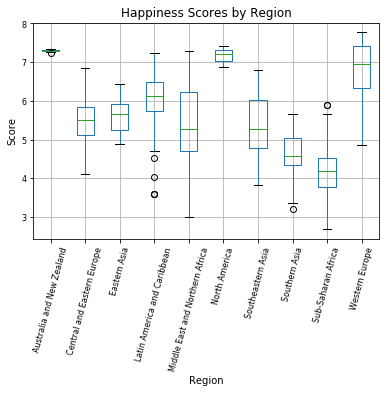

In [32]:
fig1 = full_data.boxplot(column = ['score'], by = 'region', rot = 75, fontsize = 8)
plt.suptitle('')
p = plt.gca()
p.set_xlabel('Region')
p.set_ylabel('Score')
p.set_title('Happiness Scores by Region')

Analyzing the data graphically provides even more insight. Regions like Australia and North America, while scoring highly, contain relatively few countries compared ith other regions. The Latin American region has several outliers well below the spread of the data, possibly bringing the regional mean down. The Middle East has the largest spread of all with some of the most and least happy countries in the world. There is a distinct detectable trend here between a region's developmental process and the happiness of its citizens. 

## Regional Importance of Happiness Factors:

The predictors in this dataset rate how much each factor contributes to a country's happiness score relative to a fictional dystopia. For the World Happiness Report, a dystopia is composed of the lowest score of all the coutries in each category. The predictors indicate both which factors are most important to a country's citizens and which are most present in that country as well. Mean scores are calculated for each predictor, grouped by reagion and then the top factor is selected. 

In [33]:
happiness_factors = ['economy', 'family', 'health', 'generosity', 'trust', 'freedom']
full_data.groupby('region')[happiness_factors].mean().idxmax(axis = 1)

region
Australia and New Zealand           family
Central and Eastern Europe          family
Eastern Asia                       economy
Latin America and Caribbean         family
Middle East and Northern Africa    economy
North America                      economy
Southeastern Asia                   family
Southern Asia                       family
Sub-Saharan Africa                  family
Western Europe                     economy
dtype: object

Interestingly, the most important factor for each region is always either family or economy. Family is featured as the most important in a wide range of regions from some of the least happy (Sub-Saharan Africa, South\[eastern\] Asia) and some of the happiest (Australia, Latin America). Economy was predictably featured in high production areas such as North America, Eastern Asia, and Western Europe. 

## Temporal Changes in Happiness:

Here, we would like to see which countries and regions have experienced the greatest change in general happiness over time. Looking at a line plot of the scores for countries over time is uninformative: There are simply too many countries to make a readable plot. Therefore, we can look at the numeric change of the score by country, between the earliest and latest year in the DataFrame. To do this, we will slice the DataFrame by the desired years and subtract the parts. We will then use this DataFrame to analyze temporal changes both at the country and regional level.

In [34]:
#FIXME this is temporary to se the heirarchical index for only this section
full_data.set_index(['region','country', 'year'], inplace = True)

In [35]:
idx = pd.IndexSlice

# Years are read in as strings
# Extract the data corresponding to 2019
scores_2019 = full_data.loc[idx[:,:,2019], :]

# Drop the year index for cross-year comparison
# Extract only the scores column of interest
scores_2019 = scores_2019.reset_index(level = 'year')['score']

# Repeat above procedure for 2015
scores_2015 = full_data.loc[idx[:,:,2015], :]
scores_2015 = scores_2015.reset_index(level = 'year')['score']

#Store a multi-indexed series corresponding to the
# change across years
scores_change = (scores_2019 - scores_2015)

### Changes in Happiness by Region

We can start with a broad question: How did happiness among the regions change? There are far fewer regions than there are countries, so we can simply view the regional data directly. We will do so from the most negative change to the most positive overall change.

In [39]:
scores_change.mean(level = 'region').sort_values(ascending = False)

region
Central and Eastern Europe         0.227214
Western Europe                     0.159050
Sub-Saharan Africa                 0.145083
Eastern Asia                       0.062667
Australia and New Zealand         -0.017500
Southeastern Asia                 -0.043778
Southern Asia                     -0.054000
Middle East and Northern Africa   -0.093789
North America                     -0.188000
Latin America and Caribbean       -0.194750
Name: score, dtype: float64

The region with the greatest increase in happiness was Central and Eastern Europe. This makes sense. On the whole, Central Europe is more stable than many of the regions listed, but it is not as economically developed as Western Europe (the region with the second-highest growth). This combination of stability and room for growth means that the region as a whole is better positioned for higher *gains* in overall happiness than other regions. 

The region with the greatest decrease in happiness was Latin America and the Carribean. We can speculate that this change was due to political and economic upheaval in the region.

It is important to note that these regional explanations are fairly speculative. They also represent a large generalization. As can be seen from the boxplot above, many countries in the same region vary widely with regard to their overall happiness level. It is also important to note that these changes are relatively small on the scale of the true measurements we are using. The maximum and minimum changes are approximately $\pm 0.2$, which is certainly small with respect to the overall scores, which are on the order of $4$ to $7$. This is consistent with the fact that we are averaging over many values to obtain regional estimates.

### Changes in Happiness by Country

We now want to see which countries have experienced the greatest positive change in happiness. We can do this with the `nlargest()` method. This is like `idxmax()`, but returns multiple values. Let's see the five countries that experienced the highest growth in score, from 2015 to 2019.

In [37]:
scores_change.nlargest(5)

region                       country     
Sub-Saharan Africa           Benin           1.543
                             Ivory Coast     1.289
                             Togo            1.246
Latin America and Caribbean  Honduras        1.072
Sub-Saharan Africa           Burkina Faso    1.000
Name: score, dtype: float64

With our multi-index, we can see that four of the five countries come from Sub-Saharan Africa, with the other being from Latin America. While we do not expect impoverished countries in Africa to have high *overall* scores, this result makes sense. We would expect those countries that are still economically developing to have higher changes in happiness. The countries listed above are not fully-developed nations, and still have some "way to go" in terms of economic development. This means that the standard of living in these areas likely increased over the period studied. Even if it was only a slight increase, it would have been comparatively more than the changes felt by America and Western Europe, for example.

Now we would like to see the five countries which experienced the sharpest drop in happiness levels over the period. This time we will use the corresponding `nsmallest()` method.

In [38]:
scores_change.nsmallest(5)

region                       country  
Latin America and Caribbean  Venezuela   -2.103
Sub-Saharan Africa           Lesotho     -1.096
                             Zambia      -1.022
                             Zimbabwe    -0.947
Latin America and Caribbean  Haiti       -0.921
Name: score, dtype: float64

Interestingly enough, the countries that experienced the sharpest decrease in happiness are also from the same regions as the ones that experienced the sharpest increase. This, too, makes sense. The countries in Sub-Saharan Africa, the Carribean, and Latin America are not as politically and econimically stable as more developed nations. As such, although there is a possibility for growth and lifestyle improvement, there is unfortunately also the possibility of political upheaval and economic turmoil. From the countries listed, we can see that these types of events have taken their toll on the happiness of the above countries. In the analysis for regions, we mentioned that outliers could have dragged Latin America down. This seems like it could be the case, as Venezuela was the country that experienced the highest decrease in happiness.

Finally, those countries with the smallest change in either direction are included by applying the `nsmallest()` method to the absolute value of all the temporal changes in happiness scores. 

In [104]:
abs(scores_change).nsmallest(5)

region                      country   
Sub-Saharan Africa          Nigeria       0.003
Central and Eastern Europe  Azerbaijan    0.004
Western Europe              Belgium       0.014
Sub-Saharan Africa          Comoros       0.017
Western Europe              France        0.017
Name: score, dtype: float64

Those countries experiencing the least change in any direction vary vastly in region and development. Several from Sub-Saharan Africa and Eastern Europe are largely undeveloped and so are likely experiencing economic and social stagnation. Other countries such as France are already highly developed and so have diminishing developmental returns. 

We can note here that the change in scores on the country level is of a much higher magnitude than the changes observed on the regional level. In fact, the maximum and minimum changes on the country level are larger by approximately a order of magnitude. This shows that these scores do indeed measure something meaningful. By looking at the individual country level of variation, we can see that many countries experienced substantial changes in overall happiness in the period of 2015 to 2019. These scores capture the overall satisfaction of the population, so we are again losing information. It could be that only certain demographics in the mentioned nations became significantly more or less happy. 

However, the information conveyed here is certainly more significant than the information on a regional level. This captures the fact that even large political, social, and economic events are often isolated within countries. In the section on regional variation, we tried to generalize slightly about tendencies of regions, but making conclusions about individual nations is much more substantive.

### Happiness Factor Correlations:

In a Kaggle discussion post, a user posted about the shortcomings of modelling happiness factors against happiness score using regression methods. He points out that a perfect model would be sum(factors)=score and that regressing happiness on the other factors is non-sensical due to the different arrangement of factors within each country. To confirm this, a linear regression model can be fit using the `statsmodels` package and a residual diagnostic plot can be generated. Note: The factors mentioned above include a dystopian residual that is not included in the dataframe. 

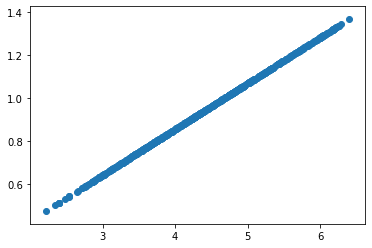

In [105]:
x = list(full_data.loc[idx[:, :, :], 'economy'])
y = list(full_data.loc[idx[:, :, :], 'score'].dropna())
happiness_mlr = sm.OLS(x, y).fit()
pred_values = happiness_mlr.fittedvalues.copy()
residuals = y - pred_values
plt.scatter(residuals, pred_values)

From the residual diagnostic plot, it is clear that the constant variance assumption is violated and that linear regression is not the correct modelling technique in this instance. 

### Discussion:

The objective of this analysis was to identify regional and temporal trends in happiness scores with the intention of potentially informing policy decisions. Regional means reveal that smaller and more developed regions are typically happier than others. Those more industrialized regions value economy as the highest influencer of happiness while all others value family the highest. Underdeveloped regions also have seen more growth in happiness between 2015 and 2019 than their developed counterparts. This makes sense as the rate of change in development slows with development per the Demographic Transition Model. The countries with the largest positive growth are all rapidly developing countries while the ones with the largest negative growth are facing civil or political unrest. The countries with the smallest growth are stagnating due to underdevelopment or overdevelopment. Finally, it was determined that regression models between happiness and the happiness factors is inconclusive. 

However, it must be noted that happiness is a subjective characteristic and difficult to assign objective measure to. While these happiness factors make for interesting valuations of the contributing causes of happiness, they must come with a caveat. How these factor scores were determined is unknown and so any analysis here must be further examined in context of the underlying contributions to each happiness factor. 